**<font color=skyblue>使用 LogisticRegression 與 LogisticRegressionCV 進行分類</font>**

Data: Wine.xlsx

<font color=yellow>Prepare Data</font>

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read data
path = r'D:\ys\B4_ShallowML\ShallowML\ClassData'
df = pd.read_excel(os.path.join(path, 'Wine.xlsx'))
X = np.array(df.iloc[:, :-1]) # 排除最後一欄標籤 N x p
y = np.array(df.iloc[:, -1])

# Split data into training and testing sets
# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train) # 標準化訓練資料
X_test_ = scaler.fit_transform(X_test) # 標準化測試資料

# print the numbers of training and testing samples
print(f"Training samples: {X_train_.shape[0]}")
print(f"Testing samples: {X_test_.shape[0]}")
# print the shape of the data
print(f"Training data shape: {X_train_.shape}")
print(f"Testing data shape: {X_test_.shape}")

Training samples: 124
Testing samples: 54
Training data shape: (124, 13)
Testing data shape: (54, 13)


<font color=yellow>Use original data to train the machine by</font>

- LogisticRegression
- LogisticRegressionCV: LogisticRegression with Cross Validation

In [2]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report

# clf_original = LogisticRegression(solver = 'lbfgs', tol = 1e-6, max_iter = int(1e6), verbose=True)
# setup parameters for LogisticRegression
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=0) # verbose=1 for more information
# --- Logistic Regression ---
solver = 'lbfgs'  # 'lbfgs' is the default
# solver = 'liblinear'
# solver = 'newton-cg'
clf_LR_original = LogisticRegression(solver = solver, **opts)
clf_LR_original.fit(X_train_, y_train) # input data must be (n_samples x n_features)
# --- Results Report ---
print(f"Logistic Regression with solver = {solver}")
# print training score
print(f"Training score = {accuracy_score(y_train, clf_LR_original.predict(X_train_)):.2%}\n")
# print testing score
y_pred = clf_LR_original.predict(X_test_)
# print(f"Testing score = {accuracy_score(y_test, y_pred):.2%}\n")
print(f"Testing score = {clf_LR_original.score(X_test_, y_test):.2%}\n")
# print classification report
print("Classification report:")
print(classification_report(y_test, y_pred))


Logistic Regression with solver = lbfgs
Training score = 100.00%

Testing score = 98.15%

Classification report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



<font color=yellow>Use LogisticRegressionCV</font>

Cross Validation with respect to Cs parameters.

In [41]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=0)
solver = 'lbfgs'  # 'lbfgs' is the default
# solver = 'liblinear'
# solver = 'newton-cg'
Cs = np.logspace(-5, 5, 20) # 20 values of C from 1e-5 to 1e5
cv = 5 # 5-fold cross-validation
# --- Logistic Regression with Cross Validation ---
clf_originalCV = LogisticRegressionCV(solver = solver, Cs = Cs, cv = cv, **opts) 
clf_originalCV.fit(X_train_, y_train) # input data must be (n_samples x n_features)
y_pred = clf_originalCV.predict(X_test_)

# --- Results Report ---
print(f"Logistic Regression with Cross Validation and solver = {solver}")
# print best C value
print(f"Best C = {clf_originalCV.C_}")
# print training score
print(f"Training score = {accuracy_score(y_train, clf_originalCV.predict(X_train_)):.2%}\n")
# print testing score
# print(f"Testing score = {accuracy_score(y_test, y_pred):.2%}\n")
print(f"Testing score = {clf_originalCV.score(X_test_, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

Logistic Regression with Cross Validation and solver = lbfgs
Best C = [69.51927962 69.51927962 69.51927962]
Training score = 100.00%

Testing score = 98.15%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



<hr>
<font color=yellow>Use principal components to train the machine</font>

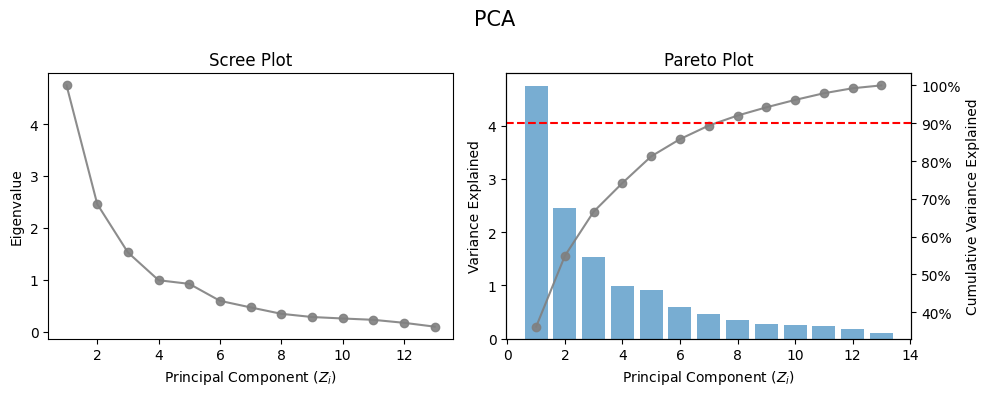

In [46]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

# train
pca = PCA()
Z_train = pca.fit_transform(X_train_)
Z_test = pca.transform(X_test_)
eigenvalues = pca.explained_variance_

# 繪製 scree plot 和 pareto plot
def plots(eigenvalues, title):
    # 計算主成分數量
    pca_range = np.arange(1, len(eigenvalues) + 1)
    # 計算解釋變異量
    cum_var_exp = np.cumsum(eigenvalues / eigenvalues.sum()) * 100

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    # Scree Plot
    ax[0].plot(pca_range, eigenvalues, 'o-', alpha=0.9, color='gray')
    ax[0].set_title('Scree Plot')
    ax[0].set_xlabel('Principal Component ($Z_i$)')
    ax[0].set_ylabel('Eigenvalue')

    # Pareto Plot
    ax2 = ax[1].twinx()  # 創建共享 x 軸的第二個 y 軸
    ax[1].bar(pca_range, eigenvalues, alpha=0.6, align='center', label='Individual explained variance')
    ax[1].set_title('Pareto Plot')
    ax[1].set_xlabel('Principal Component ($Z_i$)')
    ax[1].set_ylabel('Variance Explained')
    if title == 'PCA: Before Standardise':
        # 使用 FuncFormatter 來格式化 y 軸標籤，例如1e2
        ax[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0e}'.format(x)))
    # 畫出累積解釋變異量，用百分比表示
    ax2.plot(pca_range, cum_var_exp, 'o-', alpha=0.9, color='gray')
    ax2.axhline(90, color='red', linestyle='--', label='90% Variance')
    ax2.set_ylabel('Cumulative Variance Explained')
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

    plt.suptitle(title, fontsize=15)
    plt.tight_layout()
    plt.show()

plots(eigenvalues, 'PCA')

取 7 個主成分

In [47]:
Z_train_ = Z_train[:, :7]
Z_test_ = Z_test[:, :7]

# ========================================================

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=0)
solver = 'lbfgs'  # 'lbfgs' is the default
# solver = 'liblinear'
# solver = 'newton-cg'
Cs = np.logspace(-5, 5, 20) # 20 values of C from 1e-5 to 1e5
cv = 5 # 5-fold cross-validation
# --- Logistic Regression with Cross Validation ---
clf_originalCV = LogisticRegressionCV(solver = solver, Cs = Cs, cv = cv, **opts) 
clf_originalCV.fit(Z_train_, y_train) # input data must be (n_samples x n_features)
y_pred = clf_originalCV.predict(Z_test_)

# --- Results Report ---
print(f"Logistic Regression with Cross Validation and solver = {solver}")
# print best C value
print(f"Best C = {clf_originalCV.C_}")
# print training score
print(f"Training score = {accuracy_score(y_train, clf_originalCV.predict(Z_train_)):.2%}\n")
# print testing score
# print(f"Testing score = {accuracy_score(y_test, y_pred):.2%}\n")
print(f"Testing score = {clf_originalCV.score(Z_test_, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

Logistic Regression with Cross Validation and solver = lbfgs
Best C = [0.0143845 0.0143845 0.0143845]
Training score = 98.39%

Testing score = 100.00%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



<font color=yellow>最佳組合選擇 by GridSearchCV</font>

CV: Cross Validation 用在 hyperparameter tuning

<font color=red>警告：資料量大時，很費時</font>

In [6]:
from sklearn.model_selection import  GridSearchCV, \
                        StratifiedShuffleSplit
from datetime import datetime

# Get the current date and time
now = datetime.now()
# Format the date and time as a string
now_str = now.strftime("%Y_%m_%d_%H_%M_%S")
results_file = 'data/results_' + now_str + '.csv'

opts = dict(tol = 1e-6, max_iter = int(1e6)) # parameters for LogisticRegression
parameters = {'solver':['lbfgs', 'liblinear', 'newton-cg', 'sag','saga'], \
              'C':[0.1, 1, 10]} # parameters for GridSearchCV
# parameters = {'solver':['lbfgs', 'liblinear', 'newton-cg',\
#                         'sag','saga']}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, \
                            random_state=0) # 5-fold CV
grid = GridSearchCV(estimator=LogisticRegression(**opts), \
                param_grid=parameters, cv=cv, 
                scoring=['accuracy','f1_macro'], refit="accuracy") 
grid.fit(X_train_, y_train)
# grid.fit(X, y)
cv_logistic = pd.DataFrame(data = grid.cv_results_)
# print the results
print(cv_logistic.columns)
# cv_logistic.to_csv(results_file) # 打開來觀察結果
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_solver', 'params', 'split0_test_accuracy',
       'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy',
       'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy',
       'rank_test_accuracy', 'split0_test_f1_macro', 'split1_test_f1_macro',
       'split2_test_f1_macro', 'split3_test_f1_macro', 'split4_test_f1_macro',
       'mean_test_f1_macro', 'std_test_f1_macro', 'rank_test_f1_macro'],
      dtype='object')
{'C': 0.1, 'solver': 'lbfgs'}
0.9894736842105264
LogisticRegression(C=0.1, max_iter=1000000, tol=1e-06)
